In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris=sns.load_dataset("iris")

In [3]:
iris.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [4]:
y=iris['species'].values
X=iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [5]:
from sklearn.model_selection import train_test_split
X_trainval,X_test,y_trainval,y_test=train_test_split(X,y,test_size=0.20)

In [6]:
df_ytrain=pd.DataFrame(y_trainval)
df_ytest=pd.DataFrame(y_test)

In [7]:
print("In training Split:")
print(df_ytrain[0].value_counts())

In training Split:
virginica     41
setosa        41
versicolor    38
Name: 0, dtype: int64


In [8]:
print("In testing Split:")
print(df_ytest[0].value_counts())

In testing Split:
versicolor    12
virginica      9
setosa         9
Name: 0, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler().fit(X_trainval)
#scaler=MinMaxScaler().fit(X_trainval)
X_trainval_scaled=scaler.transform(X_trainval)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_trainval_scaled,y_trainval)

RandomForestClassifier()

In [11]:
train_score=model.score(X_trainval,y_trainval)
test_score=model.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [12]:
print("Training Accuracy:", train_score)
print("Test Accuracy:",test_score)

Training Accuracy: 0.3416666666666667
Test Accuracy: 0.3


In [13]:
y_predicted=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [14]:
print(y_test)

['versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa']


In [15]:
print(y_predicted)

['virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted,digits=3))

              precision    recall  f1-score   support

      setosa      0.000     0.000     0.000         9
  versicolor      0.000     0.000     0.000        12
   virginica      0.300     1.000     0.462         9

    accuracy                          0.300        30
   macro avg      0.100     0.333     0.154        30
weighted avg      0.090     0.300     0.138        30



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 0,  0,  9],
       [ 0,  0, 12],
       [ 0,  0,  9]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


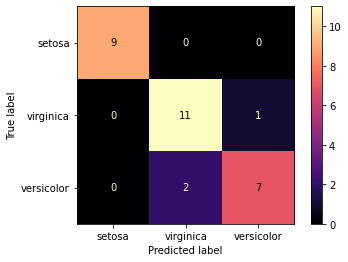

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                      X_test_scaled,
                      y_test,
                      display_labels=['setosa','virginica','versicolor'],cmap=plt.cm.magma
                      )